# 1 import req lib

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("C:/Users/Nihala Sherin A/Downloads/track_my_bus_passenger_dataset.csv")
df

,Bus_ID,Route_ID,Stop_ID,Latitude,Longitude,Day_Type,Hour,Distance_km,Traffic_Level,Bus_Capacity,Passenger_Count
0,B048,R3,S1,9.092386,74.197544,Weekday,12,13.23,High,50,49
1,B005,R3,S20,8.433561,74.707870,Weekday,20,13.80,Low,60,62
2,B026,R7,S15,9.267008,74.125261,Weekday,17,14.16,Low,60,74
3,B004,R9,S2,12.293522,74.913053,Weekday,20,5.89,Low,40,62
4,B020,R1,S17,10.582374,76.662323,Weekend,19,14.62,High,40,68
...,...,...,...,...,...,...,...,...,...,...,...
1995,B030,R10,S6,8.669577,75.747942,Weekday,19,7.62,Low,50,62
1996,B024,R1,S7,11.807051,77.704981,Weekday,10,6.41,Medium,60,65
1997,B024,R2,S15,8.712667,74.594113,Weekend,6,20.27,High,60,47
1998,B024,R9,S15,12.933870,74.443785,Weekend,13,6.53,High,60,44


In [16]:
df.head()

,Bus_ID,Route_ID,Stop_ID,Latitude,Longitude,Day_Type,Hour,Distance_km,Traffic_Level,Bus_Capacity,Passenger_Count
0,B048,R3,S1,9.092386,74.197544,Weekday,12,13.23,High,50,49
1,B005,R3,S20,8.433561,74.707870,Weekday,20,13.80,Low,60,62
2,B026,R7,S15,9.267008,74.125261,Weekday,17,14.16,Low,60,74
3,B004,R9,S2,12.293522,74.913053,Weekday,20,5.89,Low,40,62
4,B020,R1,S17,10.582374,76.662323,Weekend,19,14.62,High,40,68


# 2 EDA

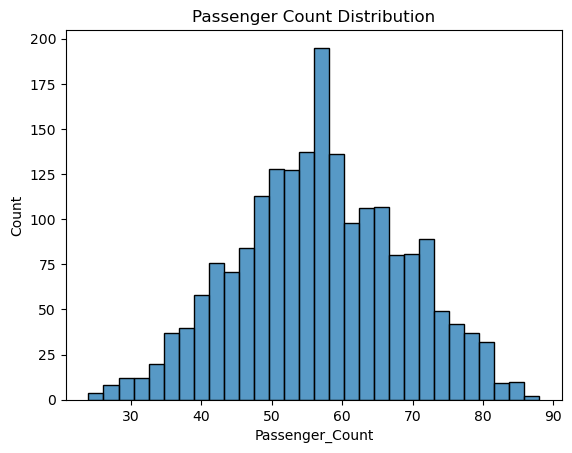

In [17]:
# passenger count distribution
plt.figure()
sns.histplot(df['Passenger_Count'], bins=30)
plt.title("Passenger Count Distribution")
plt.show()


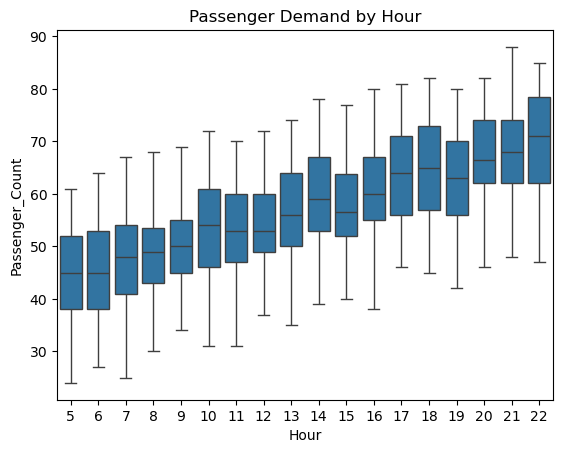

In [18]:
# passenger demand by hour
plt.figure()
sns.boxplot(x='Hour', y='Passenger_Count', data=df)
plt.title("Passenger Demand by Hour")
plt.show()

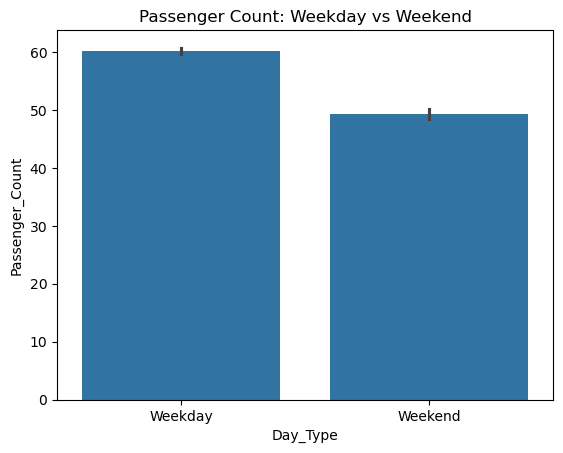

In [19]:
# weekday vs weekend passenger count
plt.figure()
sns.barplot(x='Day_Type', y='Passenger_Count', data=df)
plt.title("Passenger Count: Weekday vs Weekend")
plt.show()

# 3 Features eng

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Route_ID', 'Stop_ID', 'Day_Type', 'Traffic_Level']:
    df[col] = le.fit_transform(df[col])
x = df[['Route_ID', 'Stop_ID', 'Day_Type', 'Hour',
        'Distance_km', 'Traffic_Level', 'Bus_Capacity']]
y = df['Passenger_Count']    
    

# 4 Train Test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=30)

# 5 Modeling

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print(lr.score(X_test,y_test))

MAE: 6.266527838491686
MSE: 53.08770615553482
RMSE: 7.286131082785625
R2 Score: 0.6348160335996504
0.6348160335996504


In [38]:
from sklearn.svm import SVC
model = svm.SVC(kernel = 'rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
y_pred_svm=model.predict(X_test)
print("SVM")
print("MAE:", mean_absolute_error(y_test, y_pred_svm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svm)))
print("R2:", r2_score(y_test, y_pred_svm))
print(model.score(X_test,y_test))

SVM
MAE: 9.29
RMSE: 11.66576186967658
R2: 0.06385320469827516
0.0225


In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=30)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest (Before Tuning)")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))
print(rf.score(X_test,y_test))

Random Forest (Before Tuning)
MAE: 6.4527
RMSE: 7.689009949271752
R2: 0.593314595263891
0.593314595263891


# 6 hyper parameter tuning

In [29]:

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=30),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print(grid.fit(X_train, y_train))
print(grid.score(X_test,y_test))

In [40]:
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Best RMSE:", np.sqrt(-grid.best_score_))  #best score

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best RMSE: 7.808172418408631


In [42]:
print("Random Forest ")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R2:", r2_score(y_test, y_pred_best))

Random Forest (After Tuning)
MAE: 6.456823112788807
RMSE: 7.687108779097274
R2: 0.5935156829408974


In [27]:
df['Predicted_Passenger_Count'] = best_model.predict(x)
df.to_csv("passenger_demand_predictions.csv", index=False)

In [28]:
results = pd.DataFrame({
    "Actual Passenger Count": y_test,
    "Predicted Passenger Count": y_pred_best
})

results.head()

,Actual Passenger Count,Predicted Passenger Count
1856,56,62.103105
364,68,74.317542
1948,34,39.730318
1458,57,49.553701
609,59,49.989136


In [4]:
import pickle
with open('model','wb') as file:
  pickle.dump('y_pred_best',file)
    


In [5]:
with open('model','rb')as file:
    mp=pickle.load(file)

In [6]:
pickle.dump(mp,open('scaler1.sav','wb'))

Lowest RMSE = Best Model (usually Random Forest)